In [32]:
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [17]:
df=pd.read_csv('C:\\Users\\Nisha\\Desktop\\Sales_add.csv')

In [6]:
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.



In [3]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


array([[<AxesSubplot:title={'center':'Sales_before_digital_add(in $)'}>,
        <AxesSubplot:title={'center':'Sales_After_digital_add(in $)'}>]],
      dtype=object)

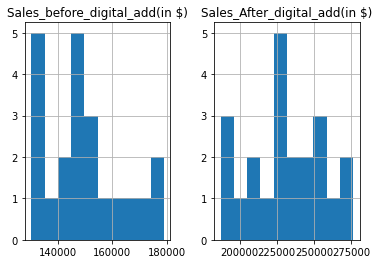

In [7]:
df.hist()

In [21]:
st.shapiro(df['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [67]:
st.shapiro(df['Sales_After_digital_add(in $)'])

ShapiroResult(statistic=0.9702128767967224, pvalue=0.7159645557403564)

In [13]:
#Here p value > alpha.so consider this as normal distribution
#H0:Sales before digital marketing = sales after digital marketing.
#H1:Sales before digital marketing < sales after digital marketing.
#alpha=0.05

In [16]:
df['sales_increase']=df['Sales_After_digital_add(in $)']-df['Sales_before_digital_add(in $)']
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),sales_increase
0,Month-1,Region - A,Manager - A,132921,270390,137469
1,Month-2,Region - A,Manager - C,149559,223334,73775
2,Month-3,Region - B,Manager - A,146278,244243,97965
3,Month-4,Region - B,Manager - B,152167,231808,79641
4,Month-5,Region - C,Manager - B,159525,258402,98877
5,Month-6,Region - A,Manager - B,137163,256948,119785
6,Month-7,Region - C,Manager - C,130625,222106,91481
7,Month-8,Region - A,Manager - A,131140,230637,99497
8,Month-9,Region - B,Manager - C,171259,226261,55002
9,Month-10,Region - C,Manager - B,141956,193735,51779


In [74]:
st.ttest_rel(df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'])


Ttest_relResult(statistic=-12.09070525287017, pvalue=6.336667004575778e-11)

In [ ]:
#Here p value is < alpha.So we are rejecting null hypothesis.
#Concluding that digital marketing increases the sales.

# ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.



In [26]:
#H0:The Region and Manager are independent
#H1:The Region and Manager are not independent

In [33]:
df_table=pd.crosstab(df['Region'],df['Manager'])
print(df_table)

Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1


In [34]:
observed_values=df_table.values
observed_values

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

In [38]:
val=st.chi2_contingency(df_table)
val

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [45]:
expected_values=val[3]

In [49]:
no_of_rows=len(df_table.iloc[0:3,0])
no_of_columns=len(df_table.iloc[0,0:3])
dof=(no_of_rows-1)*(no_of_columns-1)
print('Degree of freedom=',dof)
alpha=0.05

Degree of freedom= 4


In [56]:
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistics=chi_square[0]+chi_square[1]+chi_square[2]
print('chi-square statistic:',chi_square_statistics)

chi-square statistic: 3.0505668934240364


In [58]:
pvalue=1-st.chi2.cdf(x=chi_square_statistics,df=dof)
print('p value is',pvalue)

p value is 0.5493991051158094


In [62]:
critical_value=st.chi2.ppf(q=1-alpha,df=dof)
print('critical value is:',critical_value)

critical value is: 9.487729036781154


In [63]:
#Here p value is > alpha.Also critical value is > chi-square stsatistics.So we are accepting null hypothesis.
#Therefore concluding that the Region and Manager are independent.